# Modeling8: 수치형 변수 범주화
> 수치형 변수들은 호감도와 같은 정보를 나타내는데, 이는 객관적으로 수치화하기 어려울 수 있기에 5개 항목으로 범주화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
data_origin = pd.read_csv("https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/csv/married_full.csv")
data_origin

,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,married
0,female,21.0,27.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0
1,female,21.0,22.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,0
2,female,21.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,5.0,1
3,female,21.0,23.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,1
4,female,21.0,24.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,male,25.0,26.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,5.0,5.0,5.0,NaN,NaN,0.64,10.0,2.0,5.0,0
8358,male,25.0,24.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,6.0,8.0,4.0,4.0,NaN,0.71,10.0,4.0,4.0,0
8359,male,25.0,29.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,...,7.0,8.0,8.0,8.0,NaN,-0.46,10.0,6.0,5.0,0
8360,male,25.0,22.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,6.0,5.0,4.0,NaN,5.0,0.62,10.0,5.0,5.0,0


In [3]:
# 전처리를 위한 원본 데이터 복사
data = data_origin.copy()

In [4]:
# 메모리를 효율적으로 사용하기 위한 downcast 함수 정의
def downcast(df, verbose=True):     # verbose 옵션 추가: (True)인 경우 몇 퍼센트 압축됐는지 출력
    start_mem = df.memory_usage().sum() / 1024**2   # 초기 메모리 사용량
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print(f'{(100*(start_mem - end_mem) / start_mem):.1f}% 압축됨')

    return df

In [5]:
downcast(data)

49.6% 압축됨


,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,married
0,female,21.0,27.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0
1,female,21.0,22.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,0
2,female,21.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,5.0,1
3,female,21.0,23.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,1
4,female,21.0,24.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,male,25.0,26.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,5.0,5.0,5.0,NaN,NaN,0.64,10.0,2.0,5.0,0
8358,male,25.0,24.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,6.0,8.0,4.0,4.0,NaN,0.71,10.0,4.0,4.0,0
8359,male,25.0,29.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,...,7.0,8.0,8.0,8.0,NaN,-0.46,10.0,6.0,5.0,0
8360,male,25.0,22.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,6.0,5.0,4.0,NaN,5.0,0.62,10.0,5.0,5.0,0


In [6]:
data.describe().round(2)

,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,eval_by_partner_attractive,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,married
count,8290.00,8260.00,8300.00,8279.00,8279.00,8279.00,8271.00,8264.00,8242.00,8158.00,...,8091.00,8076.00,8022.00,7679.00,7392.00,8227.00,8300.00,8134.00,8082.00,8362.00
mean,26.35,26.37,3.65,22.49,17.39,20.27,17.46,10.70,11.85,6.19,...,7.18,7.37,6.40,6.78,5.48,0.20,5.53,6.14,5.21,0.18
std,3.57,3.57,2.81,12.57,7.04,6.78,6.08,6.13,6.36,1.95,...,1.74,1.55,1.95,1.79,2.15,0.30,1.74,1.84,2.13,0.38
min,18.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00
25%,24.00,24.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,...,6.00,6.00,5.00,6.00,4.00,-0.01,5.00,5.00,4.00,0.00
50%,26.00,26.00,3.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,...,7.00,7.00,7.00,7.00,6.00,0.21,6.00,6.00,5.00,0.00
75%,28.00,28.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,...,8.00,8.00,8.00,8.00,7.00,0.43,7.00,7.00,7.00,0.00
max,55.00,55.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,...,10.00,10.00,10.00,10.00,10.00,0.91,10.00,10.00,10.00,1.00


> Train/Test data split

In [7]:
# 공통 전처리
data = pd.get_dummies(data, columns=['gender'], drop_first=True)

In [8]:
# 단순 랜덤 샘플링
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(data, test_size = 0.2, random_state=42)


# 계층적 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['married']):
    sss_train_set = data.loc[train_index]
    sss_test_set = data.loc[test_index]

In [9]:
X_train = sss_train_set.drop("married", axis=1)
y_train = sss_train_set["married"].copy()

X_test = sss_test_set.drop("married", axis=1)
y_test = sss_test_set["married"].copy()

# Preprocessing

In [12]:
# null값은 중앙값으로 대체
median_value = X_train.median()
X_train.fillna(median_value, inplace=True)
X_test.fillna(median_value, inplace=True)

In [13]:
X_train.isnull().sum().sum()

0

In [14]:
select_columns = ['importance_same_religion', 'pref_of_partner_attractive', 'pref_of_partner_sincere', 'pref_of_partner_intelligence',
 'pref_of_partner_funny', 'pref_of_partner_ambitious', 'pref_of_partner_shared_interests', 'eval_by_partner_attractive',
 'eval_by_partner_sincere', 'eval_by_partner_intelligence', 'eval_by_partner_funny', 'eval_by_partner_ambitous',
 'eval_by_partner_shared_interests', 'my_pref_attractive', 'my_pref_sincere', 'my_pref_intellicence',
 'my_pref_funny', 'my_pref_ambtition', 'my_pref_shared_interests', 'my_eval_attractive', 'my_eval_sincere',
 'my_eval_intelligence', 'my_eval_funny', 'my_eval_ambition', 'my_eval_shared_interests', 'interests_correlate',
 'expected_happy_with_couple_match', 'how_much_i_liked', 'guess_prob_liked'
 ]

In [15]:
# select_columns를 구간별로 범주화
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_train_binned = kbins.fit_transform(X_train[select_columns])
X_test_binned = kbins.transform(X_test[select_columns])

X_train_binned = pd.DataFrame(X_train_binned, columns=select_columns)
X_test_binned = pd.DataFrame(X_test_binned, columns=select_columns)

c:\Users\prohe\anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\prohe\anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\prohe\anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\prohe\anaconda3\envs\py38\lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\prohe\anaconda3\envs\py

In [16]:
X_train.reset_index(drop=True, inplace=True)
X_train_cut = pd.concat([X_train_binned, X_train[['age', 'age_partner', 'gender_male']]], axis=1)

X_test.reset_index(drop=True, inplace=True)
X_test_cut = pd.concat([X_test_binned, X_test[['age', 'age_partner', 'gender_male']]], axis=1)

In [17]:
num_attribs = ['age', 'age_partner']

# 수치형 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_cut[num_attribs] = scaler.fit_transform(X_train_cut[num_attribs])
X_test_cut[num_attribs] = scaler.transform(X_test_cut[num_attribs])

In [18]:
X_train_cut

,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,eval_by_partner_attractive,eval_by_partner_sincere,eval_by_partner_intelligence,...,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,age,age_partner,gender_male
0,6.0,2.0,5.0,1.0,6.0,6.0,5.0,4.0,3.0,3.0,...,0.0,0.0,0.0,3.0,3.0,1.0,1.0,0.463693,-0.657160,True
1,6.0,5.0,6.0,6.0,1.0,6.0,2.0,4.0,1.0,3.0,...,2.0,1.0,3.0,4.0,4.0,3.0,2.0,-0.384368,1.880797,True
2,5.0,2.0,2.0,4.0,3.0,8.0,5.0,1.0,5.0,5.0,...,4.0,2.0,4.0,8.0,4.0,3.0,3.0,0.463693,-0.939155,True
3,0.0,0.0,4.0,6.0,5.0,7.0,2.0,3.0,4.0,4.0,...,6.0,1.0,5.0,0.0,3.0,5.0,5.0,-0.667055,-0.375165,True
4,0.0,8.0,5.0,4.0,1.0,4.0,0.0,4.0,2.0,2.0,...,0.0,1.0,0.0,0.0,3.0,0.0,0.0,-0.101681,0.188826,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,2.0,5.0,2.0,1.0,4.0,7.0,5.0,6.0,4.0,4.0,...,4.0,3.0,4.0,2.0,0.0,3.0,4.0,0.181006,-0.657160,False
6685,0.0,0.0,3.0,4.0,6.0,5.0,7.0,5.0,4.0,4.0,...,3.0,3.0,4.0,4.0,3.0,3.0,4.0,-0.384368,0.188826,False
6686,2.0,4.0,4.0,4.0,6.0,7.0,2.0,2.0,1.0,1.0,...,3.0,3.0,5.0,1.0,3.0,4.0,5.0,0.181006,-1.221150,False
6687,0.0,1.0,5.0,4.0,6.0,8.0,3.0,3.0,5.0,4.0,...,2.0,2.0,1.0,5.0,4.0,3.0,4.0,-0.384368,2.162792,True


In [23]:
# SMOTE-Tomek 샘플링
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_resampled, y_resampled = smoteto.fit_resample(X_train_cut, y_train)

In [24]:
X_resampled.shape, y_resampled.shape

((10954, 32), (10954,))

> 기본적인 데이터셋 준비 완료

# Model Training

In [33]:
# lightgbm 모델 학습
from lightgbm import LGBMClassifier

params = {
    'n_estimators': 300,        #* 반복 수행하려는 트리의 개수 (너무 크면 오버피팅 발생)
    'max_depth': 5,             #* 트리의 최대 깊이 (너무 크면 오버피팅 발생)   # 보통 3~12(가장 민감하므로 먼저 튜닝해야할 값) # lightgbm처럼 leaf-wise로 학습하는 경우 끝까지(-1)도 괜찮다고 한다.
    # 'boosting_type' = 'gbdt'  # 부스팅 타입 (gbdt: Gradient Boosting Decision Tree, rf: RandomForest)
    'num_leaves': 16,           #* 하나의 트리가 가질 수 있는 최대 리프 수 (2번째로 민감. max_depth와 함께 튜닝)
    'learning_rate': 0.1,       # 부스팅 스탭 반복할 때 학습률(0~1) #튜닝시 0.1~0.3, 최종 모형은 0.05 이하
}

lgbm = LGBMClassifier(**params, objective='binary', metric='accuracy', random_state=42, verbose=0)
lgbm.fit(X_resampled, y_resampled)

LGBMClassifier(max_depth=5, metric='accuracy', n_estimators=300, num_leaves=16,
               objective='binary', random_state=42, verbose=0)

In [34]:
# Train data 성능 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_train_pred = lgbm.predict(X_resampled)
print("<<Train Set Performance>>")
print("Accuracy: ", accuracy_score(y_resampled, y_train_pred))
print("F1 Score: ", f1_score(y_resampled, y_train_pred))
print(confusion_matrix(y_resampled, y_train_pred))

<<Train Set Performance>>
Accuracy:  0.9755340514880408
F1 Score:  0.9751805889979626
[[5421   54]
 [ 214 5265]]


In [35]:
# Test data 성능 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_test_pred = lgbm.predict(X_test_cut)
print("<<Test Set Performance>>")
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

<<Test Set Performance>>
Accuracy:  0.8487746563060371
F1 Score:  0.50682261208577
[[1290   80]
 [ 173  130]]


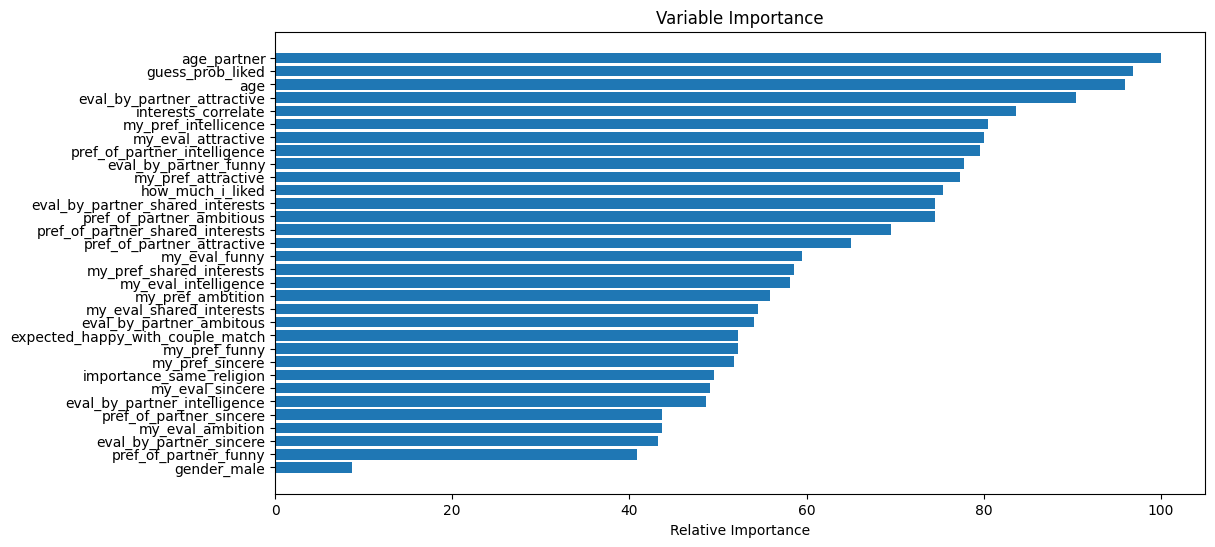

In [36]:
# 특성 중요도 시각화
feature_importance = lgbm.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train_cut.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()